In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

mnist=input_data.read_data_sets('../MNIST/data/MNIST',dtype=tf.uint8,one_hot=True)
images=mnist.train.images
labels=mnist.train.labels
pixels=images.shape[1]
num_examples=mnist.train.num_examples

filename='Records/output.tfrecords'
writer=tf.python_io.TFRecordWriter(filename)
for index in range(num_examples):
    image_raw=images[index].tostring()
    example=tf.train.Example(features=tf.train.Features(feature={'pixels':_int64_feature(pixels),
                                                                'label':_int64_feature(np.argmax(labels[index])),
                                                                'image_raw':_bytes_feature(image_raw)}))
    writer.write(example.SerializeToString())
writer.close()
print('TFRecord has been generated.')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST/data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST/data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../MNIST/data/MNIST/t10k-images-idx3-ubyte.gz
Extracting ../MNIST/data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
TFRecord has been generated.


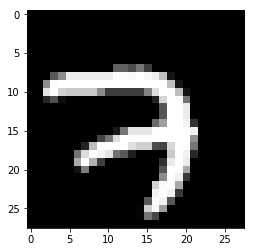

In [6]:
import tensorflow as tf

reader=tf.TFRecordReader()
filename_queue=tf.train.string_input_producer(['Records/output.tfrecords'])
_,serialized_example=reader.read(filename_queue)

features=tf.parse_single_example(serialized_example,features={'image_raw':tf.FixedLenFeature([],tf.string),
                                                              'pixels':tf.FixedLenFeature([],tf.int64),
                                                              'label':tf.FixedLenFeature([],tf.int64)})
images=tf.decode_raw(features['image_raw'],tf.uint8)
labels=tf.cast(features['label'],tf.int32)
pixels=tf.cast(features['pixels'],tf.int32)

sess=tf.Session()

coord=tf.train.Coordinator()
threads=tf.train.start_queue_runners(sess=sess,coord=coord)
image,label,pixel=sess.run([images,labels,pixels])
plt.imshow(np.reshape(image, [28, 28]), cmap='gray')
plt.show()

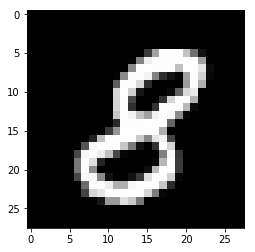

In [11]:
image,label,pixel=sess.run([images,labels,pixels])
plt.imshow(np.reshape(image, [28, 28]), cmap='gray')